In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

Define Forester fuctions for testing purposes.

In [2]:
def fh1(x):
  return np.power(6*x-2,2)*np.sin(12*x-4)+10

def fh2(x):
  return 1.5*(x+2.5)*np.sqrt(fh1(x))

def fh3(x):
  return 5*x*x*np.sin(12**x)

def fl1(x):
  return 2  * ( x + 2 ) * np.sqrt( fh1(x) - 1.3 * ( np.power(6*x-2,  2) - 6 * x ) )

def fl2(x):
  return np.power(6*x-2,  2)* np.sin(8*x-4) + 10 - ( np.power(6*x-2,  2) - 6 * x )

def fl3(x):
  return fh3(x) + (x*x*x*np.sin(3*x-0.5)) + 4*np.cos(2*x)

fh = [fh1, fh2, fh3]
fl = [fl1, fl2, fl3]

In [3]:
x_test = np.linspace(0,1,100)

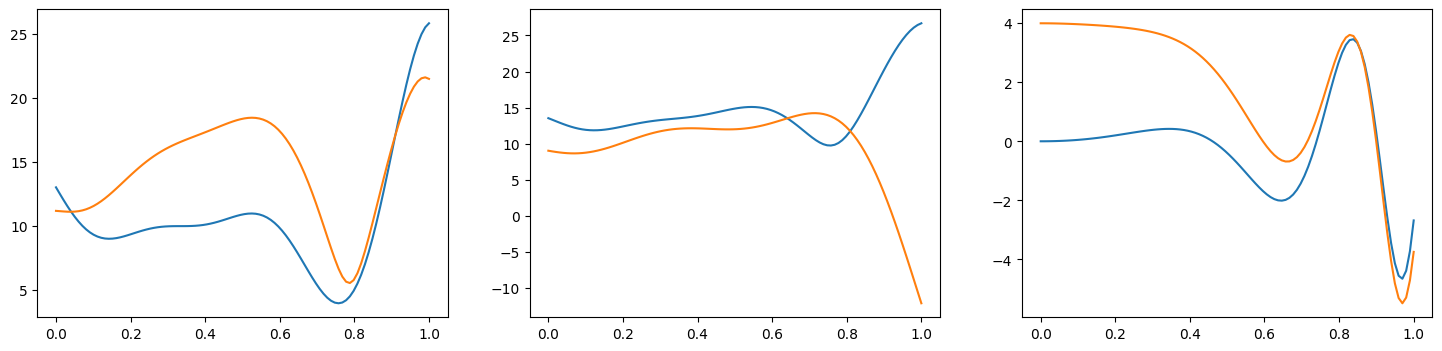

In [4]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test))
  axes[i].plot(x_test, fl[i](x_test))

In [5]:
sampler = qmc.LatinHypercube(d=1)
sample_hf = sampler.random(n=6).transpose()[0]
sample_lf = sampler.random(n=10).transpose()[0]
sample_lf = np.concatenate((sample_hf, sample_lf))

In [6]:
train_y_hf = np.stack( [ fh1(sample_hf), fh2(sample_hf), fh3(sample_hf)], -1)
train_y_lf = np.stack( [ fl1(sample_lf), fl2(sample_lf), fl3(sample_lf)], -1)

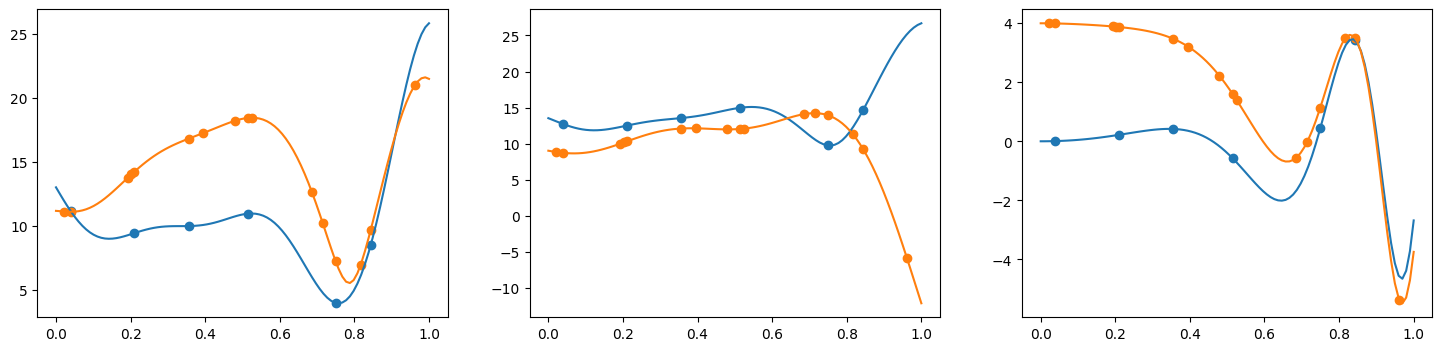

In [7]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test))
  axes[i].plot(x_test, fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i])
  axes[i].scatter(sample_lf, train_y_lf[:,i])

In [13]:
from MGPM_from_scratch import MMGP

ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

In [14]:
!pip install jaxlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement jaxlib (from versions: none)
ERROR: No matching distribution found for jaxlib


In [9]:
GP = MMGP(3, method='adam')
GP.intialize_args(1)

In [11]:
GP.fit_lf(sample_lf, train_y_lf, n_iter=1000, alpha=0.5)
GP.fit_lf(sample_lf, train_y_lf, n_iter=1000, alpha=0.1, reinitialize=False)
GP.fit_lf(sample_lf, train_y_lf, n_iter=1000, alpha=0.05, reinitialize=False)

Fitting low-fidelity model
0 loss: 82.41348298861689
1 loss: 82.39440698038615
2 loss: 82.3795626099826
3 loss: 82.36705422970087
4 loss: 82.35596219990077
5 loss: 82.34575456314536
6 loss: 82.33609669713226
7 loss: 82.32677247287106
8 loss: 82.31764528791916
9 loss: 82.30863550144488
10 loss: 82.29970520536364
11 loss: 82.29084650011481
12 loss: 82.2820716388172
13 loss: 82.27340442273356
14 loss: 82.26487272567539
15 loss: 82.25650225055242
16 loss: 82.24831169081412
17 loss: 82.24030944213456
18 loss: 82.23249192360115
19 loss: 82.22484345224487
20 loss: 82.21733749456578
21 loss: 82.20993901371213
22 loss: 82.20260755588362
23 loss: 82.19530068320293
24 loss: 82.18797736524544
25 loss: 82.18060098473981
26 loss: 82.17314168704942
27 loss: 82.16557789755447
28 loss: 82.15789693417958
29 loss: 82.15009474266373
30 loss: 82.14217486978177
31 loss: 82.13414685701875
32 loss: 82.12602427939078
33 loss: 82.11782266920875
34 loss: 82.10955755341192
35 loss: 82.10124279879597
36 loss: 82.0

In [12]:
mean_lf, std_lf = GP.mgpt.predict(x_test)
GP.mgpt.args

Cov ok


DeviceArray([  5.03880722, -10.88542064, -19.99624165, -19.29972831,
               7.6660457 ,   2.87605963,  -3.09498723,   9.68198637,
               6.22696887,   1.18404063,   3.14162768,   3.92661019,
               1.90418442], dtype=float64)

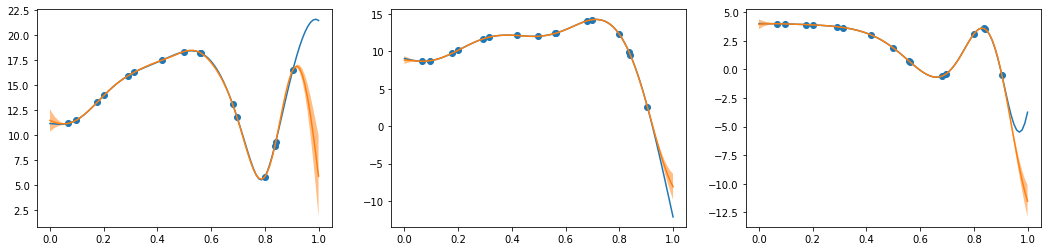

In [13]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  # axes[i].plot(x_test, fh[i](x_test))
  axes[i].plot(x_test, fl[i](x_test))
  # axes[i].scatter(sample_hf, train_y_hf[:,i])
  axes[i].scatter(sample_lf, train_y_lf[:,i])
  axes[i].plot(x_test, mean_lf[:,i])
  axes[i].fill_between(x_test,mean_lf[:,i]-std_lf[:,i],mean_lf[:,i]+std_lf[:,i], alpha=0.5 )

In [96]:
# GP.fit_diff(sample_hf, train_y_hf, n_iter=1000, alpha=0.5)
GP.fit_diff(sample_hf, train_y_hf, n_iter=5000, alpha=0.1)
# GP.fit_diff(sample_hf, train_y_hf, n_iter=1000, alpha=0.005)


Fitting difference model.
0 loss: 14.091209359541903
1 loss: 14.09124065733904
2 loss: 14.091212444551712
3 loss: 14.091158592970398
4 loss: 14.091174435599516
5 loss: 14.091162296240014
6 loss: 14.091120205307728
7 loss: 14.091118629961063
8 loss: 14.091119307356983
9 loss: 14.091088132085495
10 loss: 14.091071921170347
11 loss: 14.091074339451492
12 loss: 14.091055865688062
13 loss: 14.091032828510201
14 loss: 14.091029292722858
15 loss: 14.091019612828035
16 loss: 14.09099707918486
17 loss: 14.090986457133827
18 loss: 14.090979791303656
19 loss: 14.090960840427343
20 loss: 14.090945634720015
21 loss: 14.090938151573138
22 loss: 14.090922476363527
23 loss: 14.090905402532048
24 loss: 14.090895774044665
25 loss: 14.090881888022388
26 loss: 14.090864472186563
27 loss: 14.090852832566597
28 loss: 14.090839398040433
29 loss: 14.090822169518546
30 loss: 14.090809079616786
31 loss: 14.090795355750338
32 loss: 14.090778292287876
33 loss: 14.090764235613868
34 loss: 14.090749831471971
35 los

KeyboardInterrupt: 

In [91]:
mean_diff, std_diff = GP.diff.predict(x_test)
GP.diff.args

DeviceArray([  0.56843264, -10.84096426, -20.80078957, -19.31990948,
             -14.61168081,   1.11558942, -16.95330855, -46.79690402,
             130.39017016,  29.0177765 ,  -2.44973827,  -0.38772859,
               1.92203093, -34.6827894 ,   1.56349157, -21.19194249],            dtype=float64)

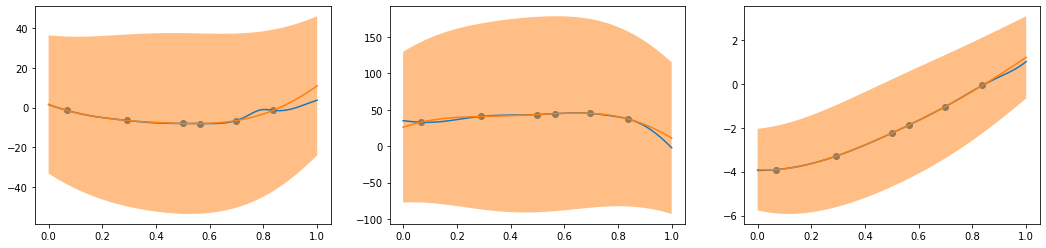

In [92]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sigma_l = 2**GP.mgpt.get_args()[1]
sigma_h = 2**GP.diff.get_args()[1]
rho = GP.diff.get_args()[-1]
rho = sigma_h/sigma_l - 2**rho

for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test)- rho[i]*fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i]-rho[i]*train_y_lf[:train_y_hf.shape[0],i])
  axes[i].plot(x_test, mean_diff[:,i])
  axes[i].fill_between(x_test,mean_diff[:,i]-std_diff[:,i],mean_diff[:,i]+std_diff[:,i], alpha=0.5 )

In [93]:
mean, std = GP.predict(x_test)

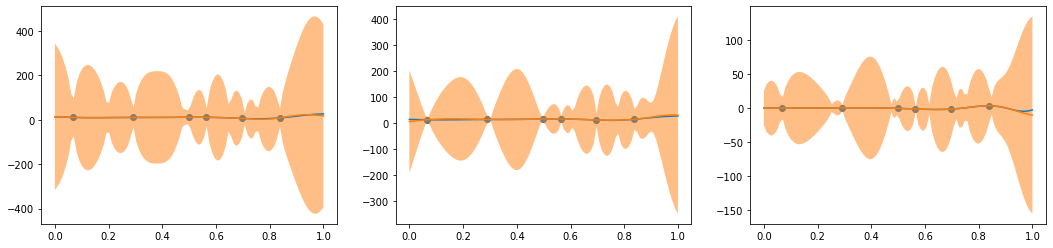

In [94]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test))
  # axes[i].plot(x_test, fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i])
  # axes[i].scatter(sample_lf, train_y_lf[:,i])
  axes[i].plot(x_test, mean[:,i])
  axes[i].fill_between(x_test,mean[:,i]-std[:,i],mean[:,i]+std[:,i], alpha=0.5 )

In [38]:
sample_lf3 = sampler.random(n=10).transpose()[0]
sample_lf3 = np.concatenate((sample_lf, sample_lf3))
train_y_lf3 = np.stack( [ fl1(sample_lf3), fl2(sample_lf3), fl3(sample_lf3)], -1)

In [39]:
GP3 = MMGP(3, method='adam')
GP3.intialize_args(1)

In [40]:
GP3.mgpt.args =  GP.mgpt.args
GP3.fit_lf(sample_lf3, train_y_lf3, n_iter=500, alpha=0.1)
GP3.fit_lf(sample_lf3, train_y_lf3, n_iter=2000, alpha=0.05)

Fitting low-fidelity model
1504.9296367908275
960.6500294558264
0 loss: 960.6500294558264
960.6500294558264
587.8176539234858
1 loss: 587.8176539234858
587.8176539234858
349.6746670599252
2 loss: 349.6746670599252
349.6746670599252
201.62500296039315
3 loss: 201.62500296039315
4 loss: 111.77046184402275
5 loss: 59.501022364209994
6 loss: 30.14305670488212
7 loss: 13.992765647393405
8 loss: 5.295178464702609
9 loss: 0.8210234264320491
10 loss: -1.2319681209038968
11 loss: -1.8907458726954722
12 loss: -1.7553174832981746
13 loss: -1.182995687599206
14 loss: -0.38918712556156976
15 loss: 0.4953605879324634
16 loss: 1.3911886483360973
17 loss: 2.250343056402535
18 loss: 3.0444799500408983
19 loss: 3.757608184807559
20 loss: 4.38158904652083
21 loss: 4.9132982614857035
22 loss: 5.352807447084391
23 loss: 5.702202847922543
24 loss: 5.964809685713767
25 loss: 6.144679570748451
26 loss: 6.246250676577578
27 loss: 6.274122937327363
28 loss: 6.232910457149714
29 loss: 6.127146002029399
30 loss: 

In [41]:
mean_lf3, std_lf3 = GP3.mgpt.predict(x_test)
GP3.mgpt.args

Cov ok


DeviceArray([  6.10056325, -16.68534084, -17.8201503 , -21.29209862,
               7.03807804,   2.13319789,  -4.91430361,   8.97501644,
               4.07048058,   4.41763658,  -1.51189996,   2.61411621,
               0.27480962], dtype=float64)

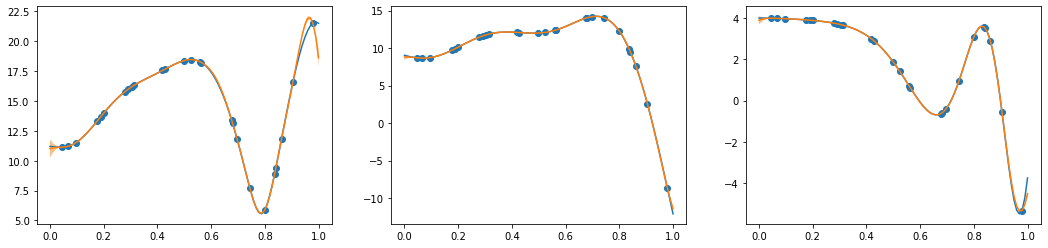

In [42]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  # axes[i].plot(x_test, fh[i](x_test))
  axes[i].plot(x_test, fl[i](x_test))
  # axes[i].scatter(sample_hf, train_y_hf[:,i])
  axes[i].scatter(sample_lf3, train_y_lf3[:,i])
  axes[i].plot(x_test, mean_lf3[:,i])
  axes[i].fill_between(x_test,mean_lf3[:,i]-std_lf3[:,i],mean_lf3[:,i]+std_lf3[:,i], alpha=0.5 )

In [83]:
# GP3.diff.args = GP.diff.args
# GP3.fit_diff(sample_hf, train_y_hf, n_iter=5000, alpha=0.05)
GP3.fit_diff(sample_hf, train_y_hf, n_iter=1000, alpha=0.01)
# GP3.fit_diff(sample_hf, train_y_hf, n_iter=1000, alpha=0.005)

Fitting difference model.
0 loss: -3.3770105452381207
1 loss: -3.376700381941119
2 loss: -3.3775920482067407
3 loss: -3.3777965467817745
4 loss: -3.3778201649306014
5 loss: -3.378458675452314
6 loss: -3.3785803983393388
7 loss: -3.3786721113778944
8 loss: -3.379156457918195
9 loss: -3.3793190773458734
10 loss: -3.3794269210211736
11 loss: -3.3798364559001515
12 loss: -3.380052311810247
13 loss: -3.380166992456009
14 loss: -3.380526624253563
15 loss: -3.3807477683540563
16 loss: -3.380909398274823
17 loss: -3.3812278078425644
18 loss: -3.381480089257507
19 loss: -3.381653670320266
20 loss: -3.3819487276813627
21 loss: -3.382208118745921
22 loss: -3.3824073045735004
23 loss: -3.3826934858153264
24 loss: -3.382940033068338
25 loss: -3.3831658434773333
26 loss: -3.3834708823878357
27 loss: -3.3837064897405655
28 loss: -3.383966699979534
29 loss: -3.3842725648243475
30 loss: -3.3845196026934525
31 loss: -3.384788670560135
32 loss: -3.3850811907056775
33 loss: -3.385345436441889
34 loss: -3.

In [84]:
mean_diff3, std_diff3 = GP3.diff.predict(x_test)
GP3.diff.args

DeviceArray([ 2.71402260e+00, -1.93572766e+01, -1.87143569e+01,
             -2.03694463e+01, -1.77775726e+01, -2.33696578e+01,
             -1.92157621e+01, -4.62349366e+01, -6.05204642e+01,
             -1.91767234e+00, -1.30707972e+00, -1.99923613e+00,
              1.56054457e-06, -2.05531404e+01, -1.88372083e+01,
              9.29929437e-02], dtype=float64)

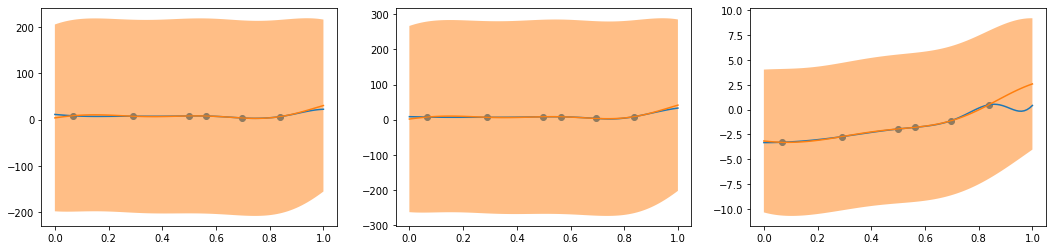

In [85]:
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sigma_l = 2**GP3.mgpt.get_args()[1]
sigma_h = 2**GP3.diff.get_args()[1]
rho = GP3.diff.get_args()[-1]
rho = sigma_h/sigma_l - 2**rho

for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test)- rho[i]*fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i]-rho[i]*train_y_lf3[:train_y_hf.shape[0],i])
  axes[i].plot(x_test, mean_diff3[:,i])
  axes[i].fill_between(x_test,mean_diff3[:,i]-std_diff3[:,i],mean_diff3[:,i]+std_diff3[:,i], alpha=0.5 )

In [86]:
mean3, std3 = GP3.predict(x_test)

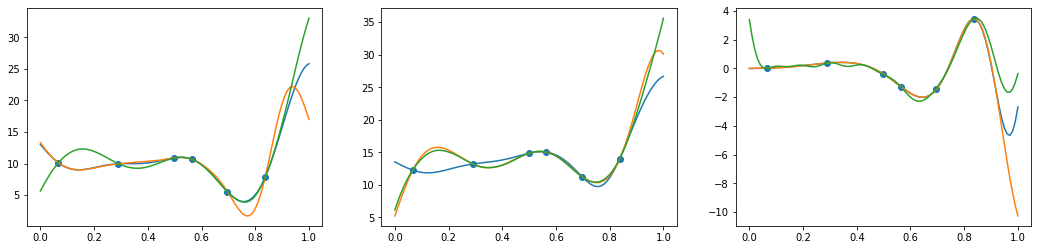

In [98]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test))
  # axes[i].plot(x_test, fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i])
  # axes[i].scatter(sample_lf, train_y_lf[:,i])
  axes[i].plot(x_test, mean[:,i])
  # axes[i].fill_between(x_test,mean[:,i]-std[:,i],mean[:,i]+std[:,i], alpha=0.5 )
  axes[i].plot(x_test, mean3[:,i])
  # axes[i].fill_between(x_test,mean3[:,i]-std3[:,i],mean3[:,i]+std3[:,i], alpha=0.5 )

In [ ]:
assert(1==0)

AssertionError: 

In [ ]:
GP2 = MMGP(3, method='jade')
GP2.intialize_args(1)

In [ ]:
GP2.fit_lf(sample_lf, train_y_lf, max_evals = 2000, NP=100)

Fitting low-fidelity model
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270

In [ ]:
mean_lf2, std_lf2 = GP2.mgpt.predict(x_test)
GP2.mgpt.args

Cov ok


array([  4.79069645, -19.99999999, -20.        , -10.25903214,
         6.55351567, -18.38449881,   6.79355971, -10.        ,
         0.26107647,   8.59916182, -10.        ,  -6.57616546,
         8.96406271])

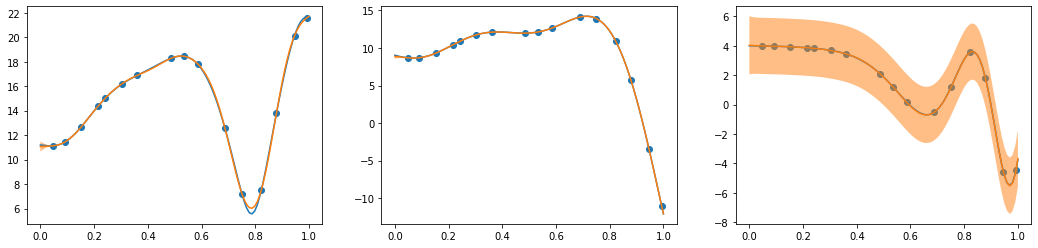

In [ ]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  # axes[i].plot(x_test, fh[i](x_test))
  axes[i].plot(x_test, fl[i](x_test))
  # axes[i].scatter(sample_hf, train_y_hf[:,i])
  axes[i].scatter(sample_lf, train_y_lf[:,i])
  axes[i].plot(x_test, mean_lf2[:,i])
  axes[i].fill_between(x_test,mean_lf2[:,i]-std_lf2[:,i],mean_lf2[:,i]+std_lf2[:,i], alpha=0.5 )

In [ ]:
GP2.fit_diff(sample_hf, train_y_hf, max_evals=5000, NP=100)

Fitting difference model.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270


In [ ]:
mean_diff2, std_diff2 = GP2.diff.predict(x_test)
GP2.diff.args

array([  6.10751109,   9.99958363,   2.04013033,  -2.99999999,
        10.        ,   3.35323218,   9.97366762, -20.        ,
        20.        ,   0.82932351,  12.52350162,  -0.77391736,
        12.74284152,   5.        ,   5.        ,   5.        ])

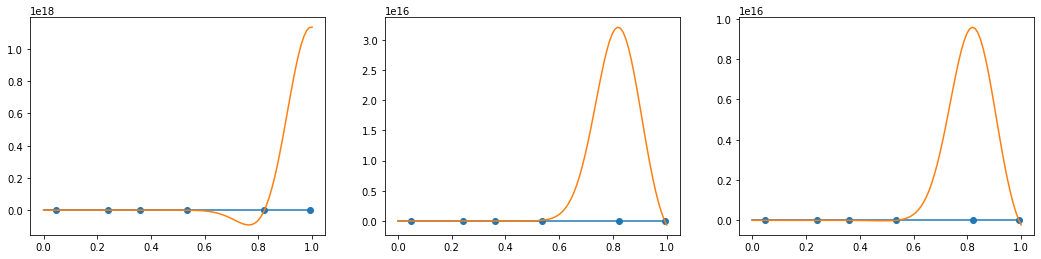

In [ ]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sigma_l = 2**GP2.mgpt.get_args()[1]
sigma_h = 2**GP2.diff.get_args()[1]
rho = GP2.diff.get_args()[-1]
rho = sigma_h/sigma_l - 2**rho

for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test)- rho[i]*fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i]-rho[i]*train_y_lf[:train_y_hf.shape[0],i])
  axes[i].plot(x_test, mean_diff2[:,i])
  axes[i].fill_between(x_test,mean_diff2[:,i]-std_diff2[:,i],mean_diff2[:,i]+std_diff2[:,i], alpha=0.5 )

In [ ]:
mean2, std2 = GP2.predict(x_test)

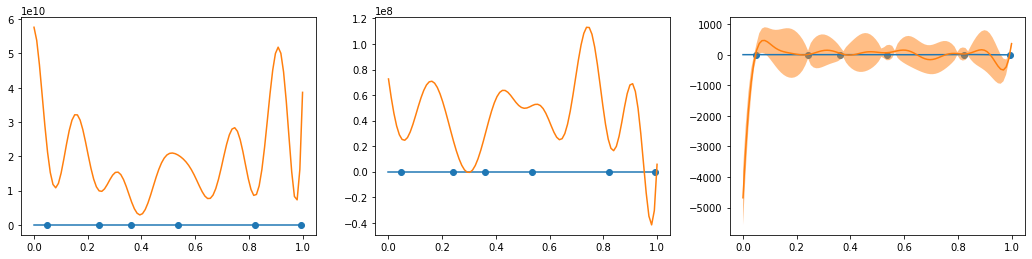

In [ ]:
# Initialize plots
f, axes = plt.subplots(1, 3, figsize=(18, 4))


for i in range(len(axes)):
  axes[i].plot(x_test, fh[i](x_test))
  # axes[i].plot(x_test, fl[i](x_test))
  axes[i].scatter(sample_hf, train_y_hf[:,i])
  # axes[i].scatter(sample_lf, train_y_lf[:,i])
  axes[i].plot(x_test, mean2[:,i])
  axes[i].fill_between(x_test,mean2[:,i]-std2[:,i],mean2[:,i]+std2[:,i], alpha=0.5 )